In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

In [7]:
data=pd.read_csv(r'C:\Users\Chithra\Downloads\titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Question 2

In [215]:
data=pd.read_csv(r'C:\Users\Chithra\Downloads\titanic_dataset.csv',index_col='PassengerId')

### Question 3

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data.shape

(891, 11)

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Question 4

In [15]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
sel_cols=data[['Age',]]
sel_cols.isna().sum()

Age    177
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(sel_cols)
sel_cols=imputer.transform(sel_cols)

In [20]:
type(sel_cols)

numpy.ndarray

In [24]:
sel_cols=pd.DataFrame(sel_cols,columns=['Age'])
type(sel_cols)

pandas.core.frame.DataFrame

In [28]:
sel_cols.isna().sum()

Age    0
dtype: int64

In [29]:
sel_cols1=data[['Cabin','Embarked']]
sel_cols1.isna().sum()

Cabin       687
Embarked      2
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(sel_cols1)
sel_cols1=imputer.transform(sel_cols1)

In [31]:
type(sel_cols1)

numpy.ndarray

In [34]:
sel_cols1=pd.DataFrame(sel_cols1,columns=['Cabin','Embarked'])
type(sel_cols1)

pandas.core.frame.DataFrame

In [38]:
sel_cols1.isna().sum()

Cabin       0
Embarked    0
dtype: int64

In [42]:
data=data.drop(['Age','Cabin','Embarked'],axis=1)
data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500


In [45]:
data=pd.concat([data,sel_cols,sel_cols1],axis=1)
data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,0.0,3.0,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,1.0,3.0,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,0.0,3.0,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
888,1.0,1.0,"Graham, Miss. Margaret Edith",female,0.0,0.0,112053,30.0000,29.699118,B96 B98,S
889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,2.0,W./C. 6607,23.4500,26.000000,C148,C
890,1.0,1.0,"Behr, Mr. Karl Howell",male,0.0,0.0,111369,30.0000,32.000000,B96 B98,Q
891,0.0,3.0,"Dooley, Mr. Patrick",male,0.0,0.0,370376,7.7500,NaN,NaN,NaN


In [47]:
data=data.drop([0],axis=0)
data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,0.0,3.0,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,1.0,3.0,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,0.0,3.0,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,2.0,"Montvila, Rev. Juozas",male,0.0,0.0,211536,13.0000,19.000000,B42,S
888,1.0,1.0,"Graham, Miss. Margaret Edith",female,0.0,0.0,112053,30.0000,29.699118,B96 B98,S
889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,2.0,W./C. 6607,23.4500,26.000000,C148,C
890,1.0,1.0,"Behr, Mr. Karl Howell",male,0.0,0.0,111369,30.0000,32.000000,B96 B98,Q


In [49]:
data=data.drop([891],axis=0)
data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,0.0,3.0,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,1.0,3.0,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,0.0,3.0,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",female,0.0,5.0,382652,29.1250,27.000000,B96 B98,S
887,0.0,2.0,"Montvila, Rev. Juozas",male,0.0,0.0,211536,13.0000,19.000000,B42,S
888,1.0,1.0,"Graham, Miss. Margaret Edith",female,0.0,0.0,112053,30.0000,29.699118,B96 B98,S
889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,2.0,W./C. 6607,23.4500,26.000000,C148,C


In [51]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Age         0
Cabin       0
Embarked    0
dtype: int64

### Question 5

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcd0cc9130>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcd0cc9670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcd0cc8dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcd0cc9c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcd0cc9ee0>],
 'means': []}

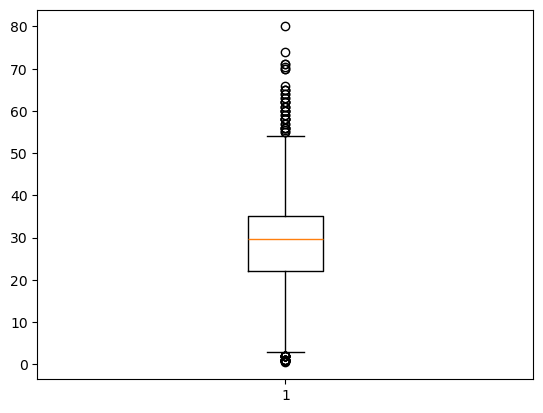

In [54]:
plt.boxplot(data['Age'])

In [56]:
Q1=np.percentile(data['Age'],25)
Q1

22.0

In [58]:
Q2=np.percentile(data['Age'],50)
Q2

29.69911764705882

In [60]:
Q3=np.percentile(data['Age'],75)
Q3

35.0

In [62]:
IQR=Q3-Q1
IQR

13.0

In [64]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit

2.5

In [66]:
upper_limit

54.5

In [68]:
outlier=[]
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [70]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [72]:
ind=data['Age']>upper_limit
data.loc[ind].index

Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252, 268,
       275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545, 555, 570,
       587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772, 829, 851, 879],
      dtype='int64')

In [74]:
data.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252, 268,
       275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545, 555, 570,
       587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772, 829, 851, 879],inplace=True)
data.shape

(848, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcda41f1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcda41f6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcda41ee70>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcda41fad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcda41fd70>],
 'means': []}

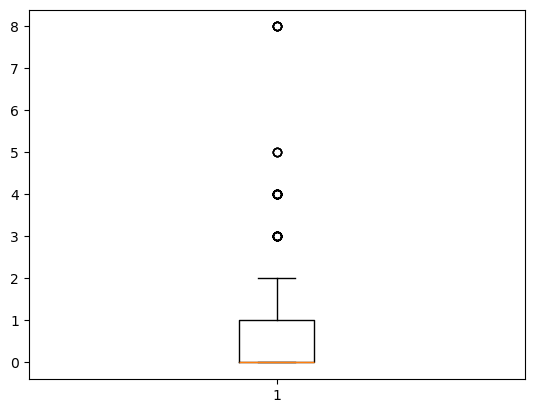

In [98]:
plt.boxplot(data['SibSp'])

In [100]:
Q1=np.percentile(data['SibSp'],25)
Q1

0.0

In [102]:
Q2=np.percentile(data['SibSp'],50)
Q2

0.0

In [104]:
Q3=np.percentile(data['SibSp'],75)
Q3

1.0

In [106]:
IQR=Q3-Q1
IQR

1.0

In [108]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit

-1.5

In [110]:
upper_limit

2.5

In [112]:
outlier=[]
for x in data['SibSp']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [114]:
outlier

[3.0,
 4.0,
 3.0,
 3.0,
 4.0,
 5.0,
 3.0,
 4.0,
 5.0,
 3.0,
 3.0,
 4.0,
 8.0,
 4.0,
 4.0,
 3.0,
 8.0,
 4.0,
 8.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 8.0,
 3.0,
 3.0,
 5.0,
 3.0,
 5.0,
 3.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 3.0,
 4.0,
 8.0,
 4.0,
 3.0,
 4.0,
 8.0,
 8.0]

In [116]:
ind=data['SibSp']>upper_limit
data.loc[ind].index

Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 687, 727, 788, 793, 814, 820, 825,
       847, 864],
      dtype='int64')

In [118]:
data.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 687, 727, 788, 793, 814, 820, 825,
       847, 864],inplace=True)

In [120]:
data.shape

(804, 11)

### Question 6

In [160]:
x=data.drop('Survived',axis=1)
y=data['Survived']
x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,3.0,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,3.0,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...
886,3.0,"Rice, Mrs. William (Margaret Norton)",female,0.0,5.0,382652,29.1250,27.000000,B96 B98,S
887,2.0,"Montvila, Rev. Juozas",male,0.0,0.0,211536,13.0000,19.000000,B42,S
888,1.0,"Graham, Miss. Margaret Edith",female,0.0,0.0,112053,30.0000,29.699118,B96 B98,S
889,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,2.0,W./C. 6607,23.4500,26.000000,C148,C


In [162]:
y

1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
886    0.0
887    0.0
888    1.0
889    0.0
890    1.0
Name: Survived, Length: 804, dtype: float64

In [164]:
x.shape

(804, 10)

In [166]:
x.Name.nunique()

804

In [168]:
x=x.drop('Name',axis=1)
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,male,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,female,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,3.0,female,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,female,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,3.0,male,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q


In [178]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x['Sex']=label_encoder.fit_transform(x['Sex'])
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,1,1.0,0.0,A/5 21171,7.2500,38.000000,C85,C
2,1.0,0,1.0,0.0,PC 17599,71.2833,26.000000,B96 B98,S
3,3.0,0,0.0,0.0,STON/O2. 3101282,7.9250,35.000000,C123,S
4,1.0,0,1.0,0.0,113803,53.1000,35.000000,B96 B98,S
5,3.0,1,0.0,0.0,373450,8.0500,29.699118,B96 B98,Q


In [180]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x['Ticket']=label_encoder.fit_transform(x['Ticket'])
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,1,1.0,0.0,500,7.2500,38.000000,C85,C
2,1.0,0,1.0,0.0,569,71.2833,26.000000,B96 B98,S
3,3.0,0,0.0,0.0,637,7.9250,35.000000,C123,S
4,1.0,0,1.0,0.0,48,53.1000,35.000000,B96 B98,S
5,3.0,1,0.0,0.0,451,8.0500,29.699118,B96 B98,Q


In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x['Cabin']=label_encoder.fit_transform(x['Cabin'])
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,1,1.0,0.0,500,7.2500,38.000000,66,C
2,1.0,0,1.0,0.0,569,71.2833,26.000000,37,S
3,3.0,0,0.0,0.0,637,7.9250,35.000000,44,S
4,1.0,0,1.0,0.0,48,53.1000,35.000000,37,S
5,3.0,1,0.0,0.0,451,8.0500,29.699118,37,Q


In [184]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x['Embarked']=label_encoder.fit_transform(x['Embarked'])
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Embarked
1,3.0,1,1.0,0.0,500,7.2500,38.000000,66,0
2,1.0,0,1.0,0.0,569,71.2833,26.000000,37,2
3,3.0,0,0.0,0.0,637,7.9250,35.000000,44,2
4,1.0,0,1.0,0.0,48,53.1000,35.000000,37,2
5,3.0,1,0.0,0.0,451,8.0500,29.699118,37,1


In [186]:
x1=x.drop(['Sex','Ticket','Cabin','Embarked'],axis=1)
x1.head()

,Pclass,SibSp,Parch,Fare,Age
1,3.0,1.0,0.0,7.2500,38.000000
2,1.0,1.0,0.0,71.2833,26.000000
3,3.0,0.0,0.0,7.9250,35.000000
4,1.0,1.0,0.0,53.1000,35.000000
5,3.0,0.0,0.0,8.0500,29.699118


In [188]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [190]:
type(x1)

numpy.ndarray

In [194]:
x1=pd.DataFrame(x1)
type(x1)

pandas.core.frame.DataFrame

In [196]:
x1.describe()

,0,1,2,3,4
count,804.000000,804.000000,804.000000,804.000000,804.000000
mean,0.634328,0.157338,0.053897,0.061594,0.517152
std,0.420509,0.266069,0.128847,0.097090,0.205530
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.015412,0.402762
50%,1.000000,0.000000,0.000000,0.025781,0.546456
75%,1.000000,0.500000,0.000000,0.058556,0.608063
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
x.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Age', 'Cabin',
       'Embarked'],
      dtype='object')

In [204]:
x=x.drop(['Age','Cabin','Embarked'],axis=1)

In [206]:
x=pd.concat([x,x1],axis=1)

In [208]:
x.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,0,1,2,3,4
1,3.0,1.0,1.0,0.0,500.0,7.2500,0.0,0.5,0.0,0.139136,0.477417
2,1.0,0.0,1.0,0.0,569.0,71.2833,1.0,0.0,0.0,0.015469,0.645390
3,3.0,0.0,0.0,0.0,637.0,7.9250,0.0,0.5,0.0,0.103644,0.645390
4,1.0,0.0,1.0,0.0,48.0,53.1000,1.0,0.0,0.0,0.015713,0.546456
5,3.0,1.0,0.0,0.0,451.0,8.0500,1.0,0.0,0.0,0.016510,1.000000


In [212]:
x.columns=['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked']
x.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,3.0,1.0,1.0,0.0,500.0,7.2500,0.0,0.5,0.0,0.139136,0.477417
2,1.0,0.0,1.0,0.0,569.0,71.2833,1.0,0.0,0.0,0.015469,0.645390
3,3.0,0.0,0.0,0.0,637.0,7.9250,0.0,0.5,0.0,0.103644,0.645390
4,1.0,0.0,1.0,0.0,48.0,53.1000,1.0,0.0,0.0,0.015713,0.546456
5,3.0,1.0,0.0,0.0,451.0,8.0500,1.0,0.0,0.0,0.016510,1.000000
